In [ ]:
##     Machine learning 5  Assignment (25.1)


# References:
# From github sources and especially from
# github.com/mridhar13

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
%matplotlib inline


In [7]:
from sklearn import datasets
# import the dataset
boston=datasets.load_boston()
features=pd.DataFrame(boston.data,columns=boston.feature_names)
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
targets=boston.target
features['PRICE']=targets.reshape(-1,1)
feature_list=list(boston.feature_names)

#### Data Cleaning


In [9]:
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [11]:
features.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [14]:
#  There is no null value present. NO need to clean

In [15]:
features.isnull().values.any()  # checking the NAN values

False

In [16]:
features.isnull().values.all()

False

In [17]:
features.describe()    # getting the information

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
X=features.iloc[:,:-1]    # not taking last term
y=features.iloc[:,-1]

In [20]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Fetures Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
# Random forest classification to the training set
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
y_predict=regressor.predict(X_test)   # predicting the data

In [27]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_predict)
print(mse)

20.719505921052633


In [29]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error :' ,metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error:  2.6813815789473687
Mean Squared Error : 20.719505921052633
Root Mean Squared Error:  4.551868398916278


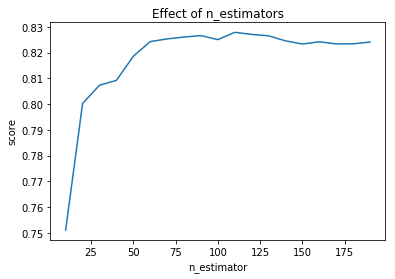

In [31]:
# Changing the estimator to know at what point we get to the good RMSE
estimators=np.arange(10,200,10)
scores=[]
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train,y_train)
    scores.append(regressor.score(X_test,y_test))

plt.title('Effect of n_estimators')  
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.plot(estimators,scores)

In [32]:
scores

[0.7511633808506298,
 0.8002162707769859,
 0.8073194205831907,
 0.8091967158794222,
 0.8185414178745166,
 0.8242506685129062,
 0.8252869972681408,
 0.8260229209186885,
 0.8265706603030071,
 0.8250258711704642,
 0.8278346387191027,
 0.8270425668854466,
 0.8264735928858723,
 0.8245368404415411,
 0.8232923898789767,
 0.8241760314543038,
 0.8233449839943503,
 0.8233862142550403,
 0.824052459992549]

In [33]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)  # above didn't show good,but we use 20
regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)

In [34]:
# Evaluating the algorithm
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error :' ,metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error:  2.4857236842105266
Mean Squared Error : 16.63509243421053
Root Mean Squared Error:  4.078614033493551


In [35]:
print(regressor.feature_importances_)   # feature importance
importances=list(regressor.feature_importances_)  # getting numerical features importances
feature_importances=[(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
feature_importances


[2.23754157e-02 1.41327807e-03 1.04014840e-02 3.20052154e-04
 1.63978930e-02 3.97712464e-01 1.25109671e-02 3.89293342e-02
 3.19360072e-03 1.72750368e-02 2.45535205e-02 1.38538336e-02
 4.41063120e-01]


[('CRIM', 0.02),
 ('ZN', 0.0),
 ('INDUS', 0.01),
 ('CHAS', 0.0),
 ('NOX', 0.02),
 ('RM', 0.4),
 ('AGE', 0.01),
 ('DIS', 0.04),
 ('RAD', 0.0),
 ('TAX', 0.02),
 ('PTRATIO', 0.02),
 ('B', 0.01),
 ('LSTAT', 0.44)]

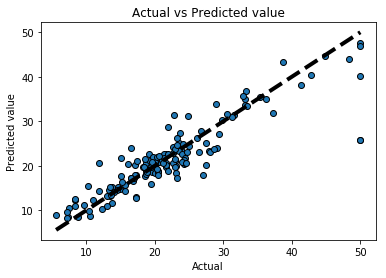

In [37]:
from sklearn.model_selection import cross_val_predict
fig,ax=plt.subplots()
ax.scatter(y_test,y_predict,edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted value")
ax.set_title('Actual vs Predicted value')
plt.show()

In [38]:
pd.DataFrame(regressor.feature_importances_,X.columns)

,0
CRIM,0.022375
ZN,0.001413
INDUS,0.010401
CHAS,0.000320
NOX,0.016398
RM,0.397712
AGE,0.012511
DIS,0.038929
RAD,0.003194
TAX,0.017275
